### Importing the libraries 

In [128]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Peek into the data by creating pandas

In [129]:
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')

In [130]:
star_df.head() #   <- top some result

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [131]:
star_df.sample(5)  #     <- some random samples 

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
136,3091,0.00810,0.2400,11.43,1,Red,M
46,3575,123000.00000,45.0000,-6.78,4,Red,M
6,2637,0.00073,0.1270,17.22,0,Red,M
150,29560,188000.00000,6.0200,-4.01,3,Blue-White,B
201,15680,0.00122,0.0114,11.92,2,Blue,B


1. Dataset contans of 240 rows, 6 features nd 1 target columns,
- Absolute Temperature (in K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Color
- Spectral Class
- Star Type (Target classes) 

Here, 
- Lo = 3.828 x 10^26 Watts (Avg Luminosity od Sun)
- Ro = ^.9551 x 10^8 m (Avg Radius of Sun)
2. Two categorical features (object type) which will need some kind of encoding
- star Color
- Spectral Class

3. Some information about above excel sheet :
- 0 -> Brown dwaft 
- 1 -> Red draft
- 2 -> White draft 
- 3 -> Main sequence
- 4 -> Supergiants
- 5 -> Hypergiants

#### To check general information about the dataframe

star_df.info()   # <- for information about csv 

### Creating a dir to save the visualization :- 

In [132]:
# Create a directory to save the visualization
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)      # if it not exists create, if exists dont create 
base_dir = f"C:/Users/Sir/Documents/Analytics_practice/{folder_name}/"

### Visualize the count of start for each type of star (using matblotlib)

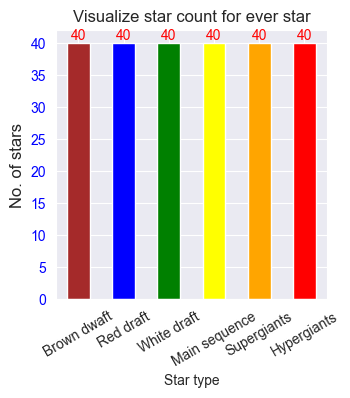

In [133]:
# Bar chart to visualize the count of stars with respective type

plt.figure(figsize=(3.5,3.5))                                         # to adjust size 
#plt.style.use('dark_background')                                     # to change the background to dark  - default/ dark_bakground 

val = star_df['Star type'].value_counts().plot(kind="bar", color=['brown', 'blue', 'green', 'yellow', 'orange', 'red'])

val.bar_label(val.containers[0], color="red")                         # for label, for ever values in the bar graph, for color too 
plt.title("Visualize star count for ever star")
plt.yticks(color='blue')                                              # to change the color of the bar graph values i.e, 0,5,10,25,....

plt.xticks(ticks=[0,1,2,3,4,5],
           labels=['Brown dwaft', 'Red draft', 'White draft', 'Main sequence', 'Supergiants', 'Hypergiants'],   #to change ticks to labels
           rotation=30)                                              # for rotation of the value lables 

plt.ylabel("No. of stars", fontsize=12)
plt.savefig(base_dir + 'barplot_star_count.png')
plt.show()

### Visualize the count of start for each type of star (using seaborn)

C:\Users\Sir\AppData\Local\Temp\ipykernel_12628\2487637046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=star_df['Star color'].value_counts().index,


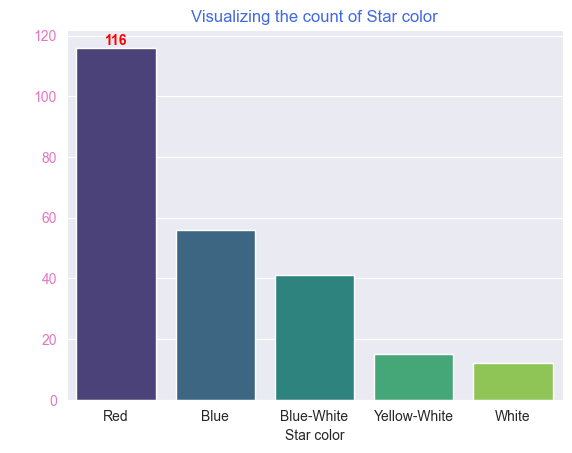

In [134]:
star_df['Star color'].value_counts()
# star_df['Star color'].value_counts().index    # for knowing the value present in requested column

# to plot 
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
           palette='viridis')
ax.bar_label(ax.containers[0], color='red', weight='bold')                 # for max value label highlight
plt.title('Visualizing the count of Star color', color='royalblue')
# plt.xticks(roration=1, color='orange')
plt.ylabel('Star color',color='white', fontsize=14)
plt.yticks(color='tab:pink')
plt.savefig(base_dir + "Visualizing using sns ")
plt.show()


## Visualization based on size and luminosity of start based on types ! 

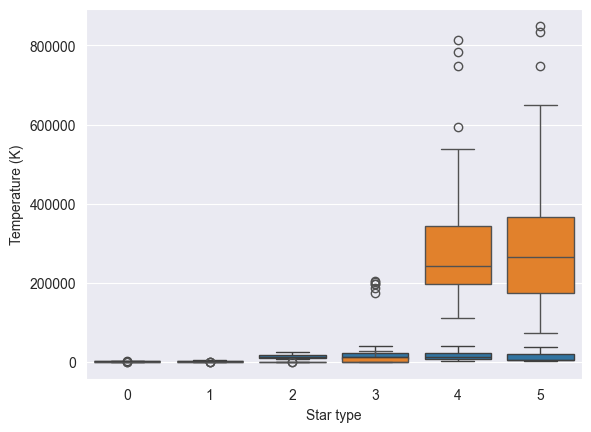

In [135]:

sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, 0])   # iloc -> location based on index (i.e., Temperature, luminosity, radius, magnitude)
sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, 1])
plt.show()

- 0 -> Brown dwaft 
- 1 -> Red draft
- 2 -> White draft 
- 3 -> Main sequence
- 4 -> Supergiants
- 5 -> Hypergiants

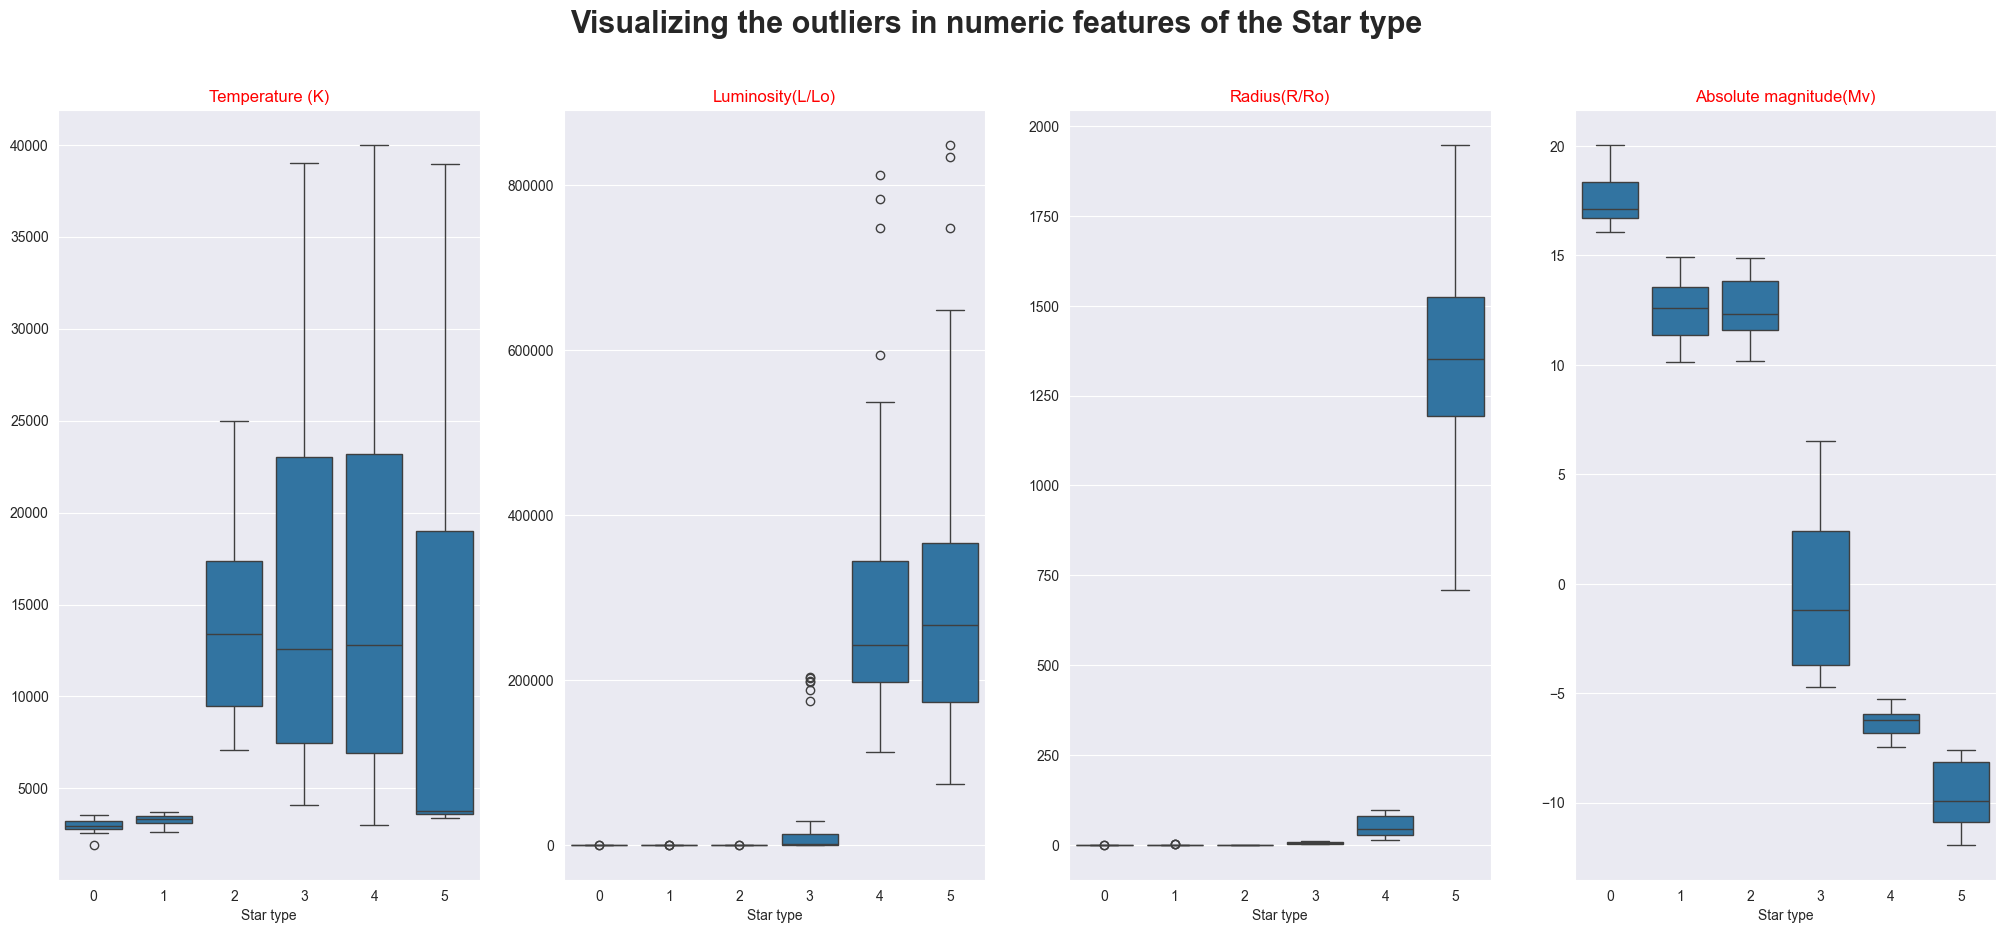

In [159]:
# plt.subplot(rows, cols, positions)  # values accordingly 
# plt.subplot(1,4,1)
# sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, 0])

plt.figure(figsize=(25,10))
plt.suptitle('Visualizing the outliers in numeric features of the Star type', fontsize=22, weight='bold')

for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i]) 
    plt.title(star_df.columns[i], color='red')
    plt.ylabel('')

plt.savefig(base_dir + 'Visualizing acc Types !')
# plt.show()

## Creating a lineplots 
- Show how the values are distributed to each of the numeric features.
- Again create a subplot but with 4 rows and 1 column. 

In [154]:
def line_plot(star_df, colors, i):
    plt.subplot(4, 1, i+1)
    plt.plot(star_df.iloc[:, i],  color=colors[i])
    plt.title(star_df.columns[i] )
    
    

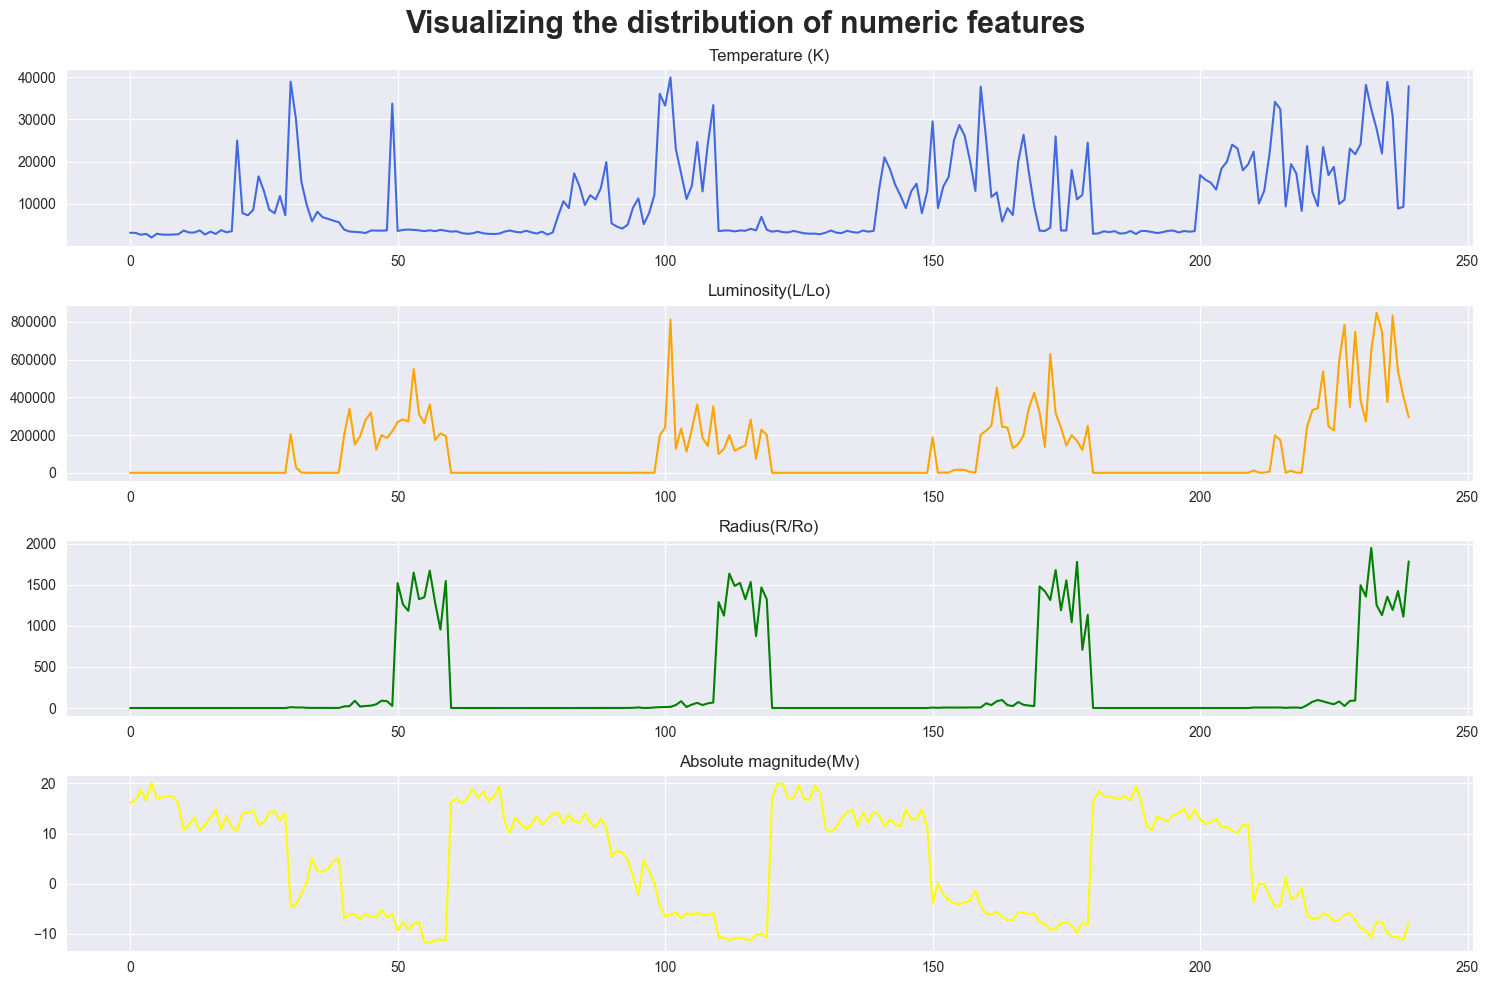

In [158]:
# line plot 
colours = ['royalblue', 'orange', 'green', 'yellow']
plt.figure(figsize=(15, 10)) # to adjust the size of the plot
plt.suptitle('Visualizing the distribution of numeric features', fontsize=22, weight='bold')


for i in range(4):           
    line_plot(star_df, colours, i)          # using the function to plot the line plot


plt.tight_layout() # to adjust the space between the plots    
plt.show()

## Pair Plot 
- Scatter plot for all the numeric features to see the relationship between them.
- Use Seaborn to get the sub plot without coding for it. 